# Data Preprocessing

In [3]:
from tensorflow.python.keras.utils.np_utils import to_categorical
import numpy as np
np.random.seed(10)

from  keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

使用reshape轉換 取得feature(784個float數字)    
忘記shape用途可以看: https://blog.csdn.net/u010758410/article/details/71554224  
reshape: https://steam.oxxostudio.tw/category/python/numpy/array-shape.html  
`reshape()` 可以將現有的陣列，轉換為特定維度的陣列，使用時必須注意特定維度的項目總數，要和原本的陣列相同，下方的例子會將一個一維陣列，轉換成 4x2 以及 2x4 的陣列。

In [4]:
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

## Normalize

In [5]:
x_train_normalize = x_train/255
x_test_normalize = x_test/255

## One-hot encoding
 - Label encoding:把每個類別mapping到某個整數 不會增加新欄位  
 - One hot encoding:為每個類別新增一個欄位 用0/1表示是否  
詳細看:[資料前處理( Label encoding、 One hot encoding)](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)


In [6]:
y_train_onehot = to_categorical(y_train_label)
y_test_onehot = to_categorical(y_test_label)

# Build model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(
    Dense(
        units = 256,
        input_dim = 784,
        kernel_initializer = 'normal',
        activation = 'relu'
    )
)
model.add(
    Dense(
        units = 10,
        kernel_initializer = 'normal',
        activation = 'softmax'
    )
)
model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

train_history = model.fit(
    x = x_train_normalize,
    y = y_train_onehot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 200,
    verbose = 2
)

Epoch 1/10
240/240 - 2s - 7ms/step - accuracy: 0.8813 - loss: 0.4438 - val_accuracy: 0.9347 - val_loss: 0.2299
Epoch 2/10
240/240 - 1s - 2ms/step - accuracy: 0.9444 - loss: 0.1935 - val_accuracy: 0.9546 - val_loss: 0.1605
Epoch 3/10
240/240 - 1s - 2ms/step - accuracy: 0.9613 - loss: 0.1369 - val_accuracy: 0.9633 - val_loss: 0.1309
Epoch 4/10
240/240 - 1s - 2ms/step - accuracy: 0.9704 - loss: 0.1050 - val_accuracy: 0.9666 - val_loss: 0.1138
Epoch 5/10
240/240 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0833 - val_accuracy: 0.9712 - val_loss: 0.1015
Epoch 6/10
240/240 - 1s - 2ms/step - accuracy: 0.9810 - loss: 0.0668 - val_accuracy: 0.9732 - val_loss: 0.0919
Epoch 7/10
240/240 - 1s - 2ms/step - accuracy: 0.9850 - loss: 0.0548 - val_accuracy: 0.9725 - val_loss: 0.0920
Epoch 8/10
240/240 - 1s - 2ms/step - accuracy: 0.9879 - loss: 0.0455 - val_accuracy: 0.9747 - val_loss: 0.0856
Epoch 9/10
240/240 - 1s - 2ms/step - accuracy: 0.9897 - loss: 0.0377 - val_accuracy: 0.9767 - val_loss: 0.0793
E

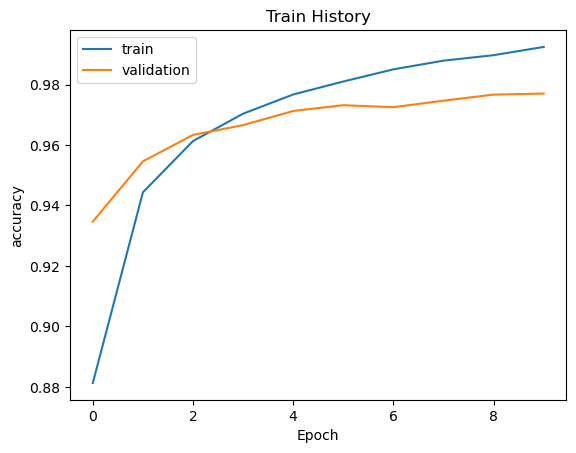

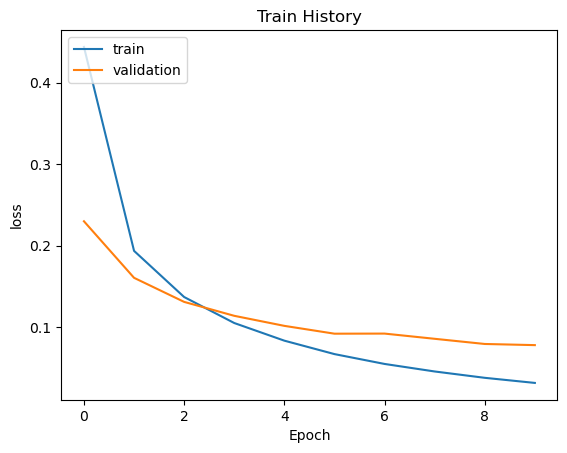

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print()
print('accuracy = ', scores[1])